# 回归

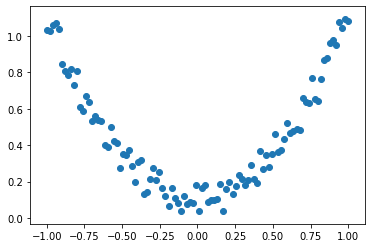

In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y = x.pow(2) + 0.2*torch.rand(x.size())

x,y = Variable(x),Variable(y)

plt.scatter(x.data,y.data)
plt.show()

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


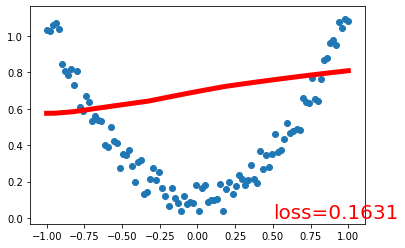

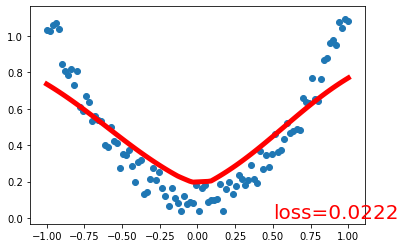

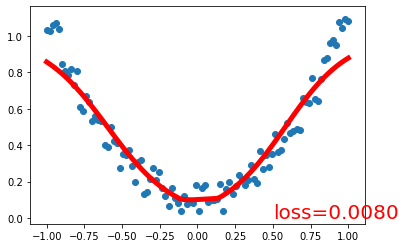

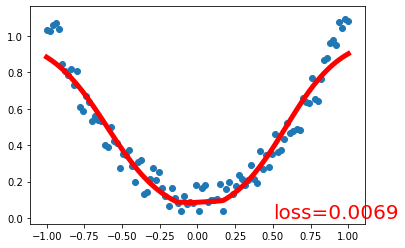

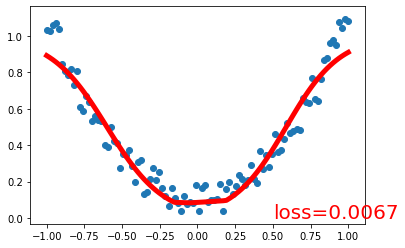

In [38]:
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden = torch.nn.Linear(n_feature,n_hidden)
        self.predict = torch.nn.Linear(n_hidden,n_output)
        
    def forward(self,x):
        x = F.relu(self.hidden(x))
        '''
        虽然视频里输出层没加激活函数为了不限制输出值y的范围，但不加激活函数时有时候拟合的曲线效果很差（会有部分横着一条线）
        我觉得大概是因为不加激活函数时反向传播的时候输出层权值的梯度容易变成0，输出层及之前层的参数就无法更新，从而学不到东西，加了sigmoid激活函数能非常有效的解决这个问题
        '''
        x = F.sigmoid(self.predict(x))
        return x
    
net = Net(1,10,1)
print(net)

#实时打印
plt.ion()
plt.show()

optimizer = torch.optim.SGD(net.parameters(),lr = 0.5)
loss_func = torch.nn.MSELoss()
for t in range(1000):
    prediction = net(x)
    # 预测值在前，真实值在后
    loss = loss_func(prediction,y)
    # 每次反向传播计算完梯度后，要把原来的梯度清空，否则梯度会在原来的梯度上累加
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
#     print("")
#     print(f"\nt = {t}=======output weight:======\n",net.predict.weight)
#     print(f"\nt={t}=======output weight grad:======\n",net.predict.weight.grad)
#     print(f"loss={loss.data.item()}")

    
    if t%200 == 0:
        # 查看网络权值
#         print("\n=======hidden weight:======\n",net.hidden.weight)
#         print("\n=======hidden weight grad:======\n",net.hidden.weight.grad)
#         print("\n=======hidden bias:=======\n",net.hidden.bias.grad)
#         print("\n=======output weight:======\n",net.predict.weight)
#         print("\n=======output weight grad:======\n",net.predict.weight.grad)
        plt.cla()
        plt.scatter(x.data.numpy(),y.data.numpy())
        plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw=5)
        plt.text(0.5,0,'loss=%.4f'%loss.data.item(),fontdict={'size':20,'color':'red'})
        plt.pause(0.1)
    
        
    

In [33]:
# 查看模型状态信息
print(net.state_dict().keys())
# 查看网络权值
print("\n=======hidden weight:======\n",net.hidden.weight)
print("\n=======hidden bias:=======\n",net.hidden.bias)
print("\n=======predict.weight:======\n",net.predict.weight)
print("\n=======predict.bias:======\n",net.predict.bias)

odict_keys(['hidden.weight', 'hidden.bias', 'predict.weight', 'predict.bias'])

=======hidden weight:======
 Parameter containing:
tensor([[-0.9963],
        [-1.4736],
        [-0.6790],
        [-1.7939],
        [-0.4812],
        [-0.2026],
        [ 0.4446],
        [ 2.2019],
        [-0.6172],
        [ 0.1415]], requires_grad=True)

=======hidden bias:=======
 Parameter containing:
tensor([-0.1410, -0.2231, -0.1036, -0.2814, -0.4817, -0.6454, -0.8633, -0.4627,
         1.2532, -0.7898], requires_grad=True)

=======predict.weight:======
 Parameter containing:
tensor([[ 0.8424,  1.3457,  0.6344,  1.6558, -0.3117, -0.2483, -0.2919,  2.2409,
         -1.2542,  0.2979]], requires_grad=True)

=======predict.bias:======
 Parameter containing:
tensor([-0.7533], requires_grad=True)
